## Decision Tree

In [137]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

### 1. Data Preparation

**Data Description**

|index|age|Age in years|
|---|---|---|
|0|Gender|Gender ; Male - 1, Female -0|
|1|cp|Chest pain type|
|2|trestbps|Resting blood pressure|
|3|chol|cholesterol measure|
|4|fbs|\(fasting blood sugar \> 120 mg/dl\) \(1 = true; 0 = false\)|
|5|restecg|ecg observation at resting condition, <br>Value 0: normal<br> Value 1: having ST-T wave abnormality \(T wave inversions and/or ST elevation or depression of \> 0\.05 mV\)<br> Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
|6|thalch|maximum heart rate achieved|
|7|exang|exercise induced angina|
|8|oldpeak|ST depression induced by exercise relative to rest|
|9|slope|the slope of the peak exercise ST segment|
|10|thal|Thal|
|11|num|target \[0=no heart disease; 1,2,3,4 = stages of heart disease \]|

**Loading dataset**

In [138]:
df = pd.read_excel("heart_disease.xlsx", sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [139]:
df.shape

(908, 13)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [141]:
# Handle missing values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### 2. Exploratory Data Analysis (EDA)

In [142]:
# Summary statistics
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


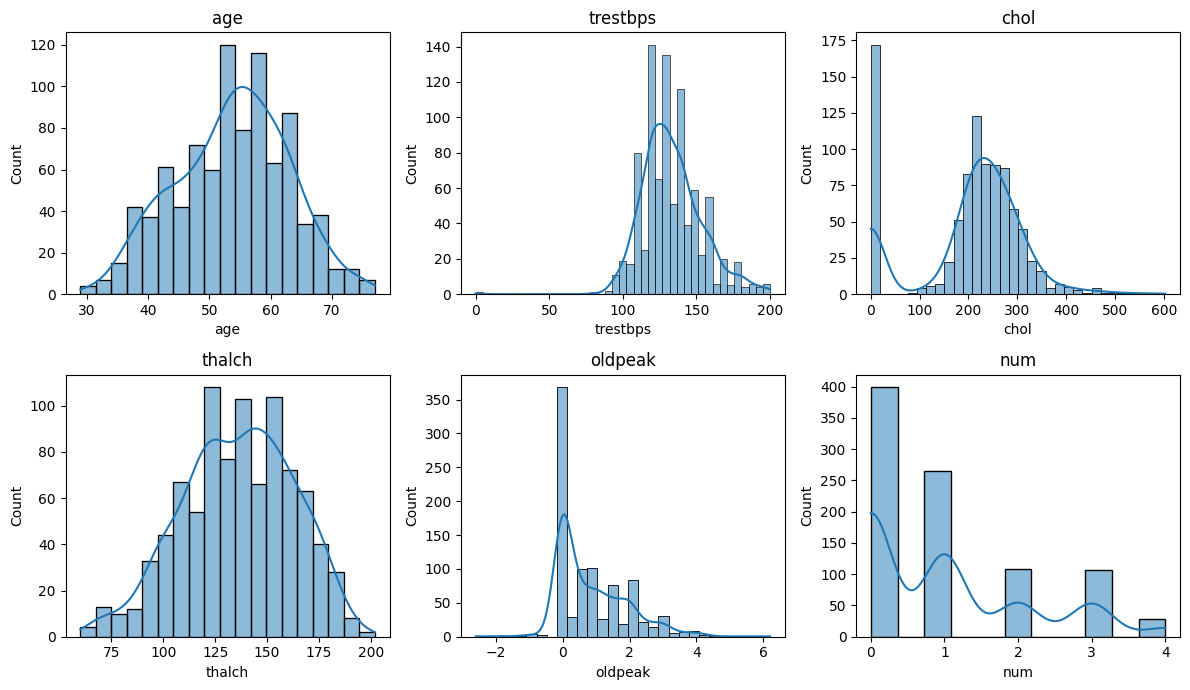

In [143]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and plot
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

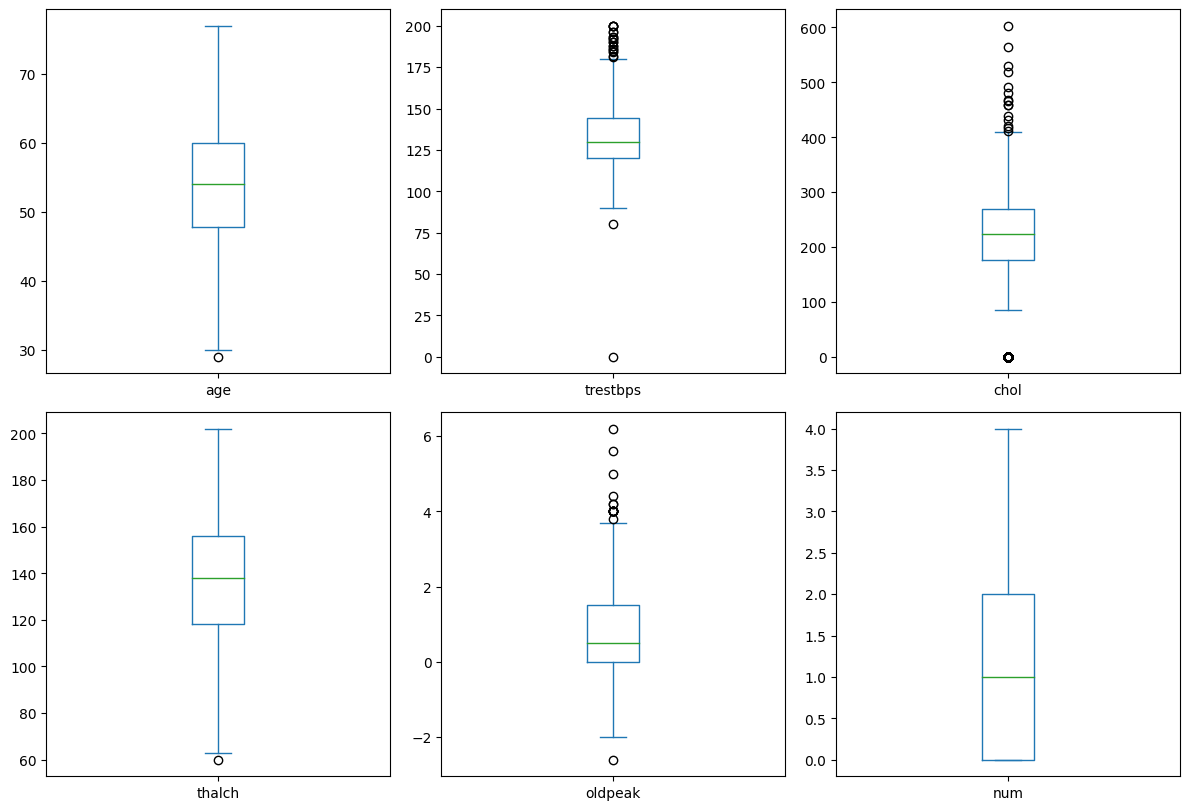

In [144]:
# Box plots
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

There are significant number of outliers in trestbps, chol and oldpeak variables.

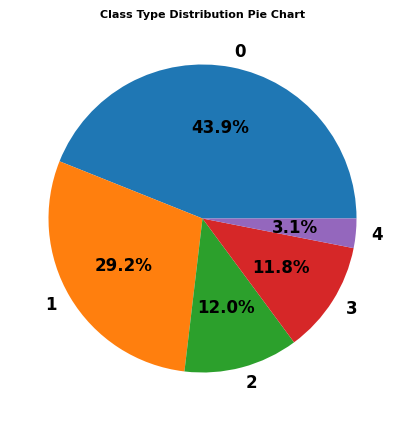

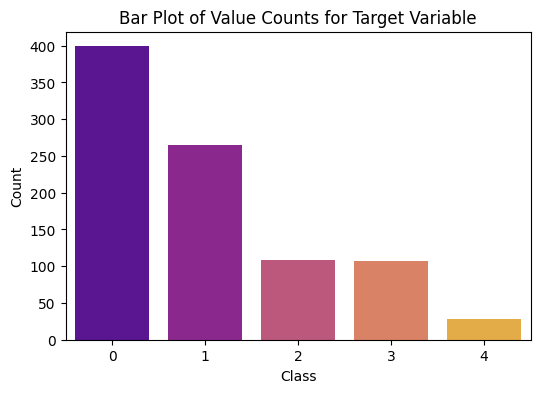

In [145]:
plt.figure(figsize = (8,5))
plt.pie(df['num'].value_counts(),
       labels=df.num.unique(),
        autopct='%1.1f%%',
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.title("Class Type Distribution Pie Chart", fontsize = 8, fontweight = 'bold')

plt.figure(figsize=(6, 4))
sns.barplot(x=df['num'].value_counts().index, y=df['num'].value_counts().values, palette='plasma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for Target Variable')
plt.show()

In [146]:
df.exang.value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

Standardizing the values in the exang column (e.g., converting TURU and FALSE to True and False)

In [147]:
# Replace values with correct case sensitivity
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})

In [148]:
df.exang.value_counts()

exang
False    535
True     373
Name: count, dtype: int64

In [149]:
df.exang.dtype

dtype('bool')

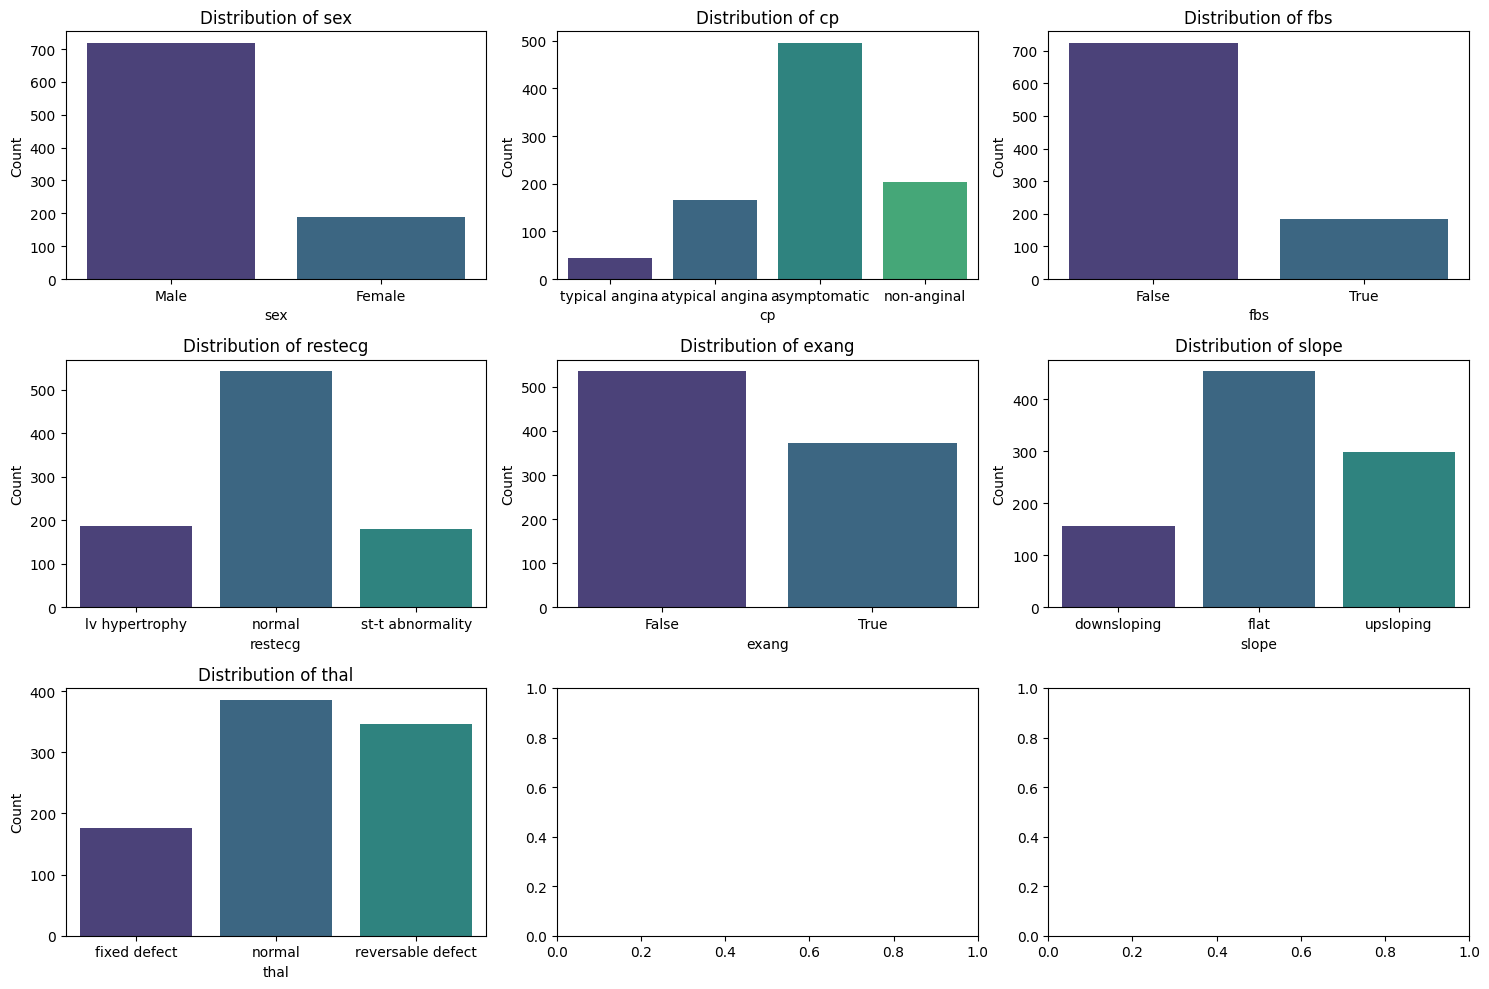

In [150]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Define a color palette
palette = sns.color_palette("viridis", 5)

# Plot bar graphs for each categorical column
num_plots = len(categorical_columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    # Get the unique categories for the column
    unique_categories = df[col].unique()
    # Generate a palette with the same number of colors as unique categories
    category_palette = sns.color_palette(palette, len(unique_categories))
    sns.countplot(data=df, x=col, ax=axes[i], palette=category_palette)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [151]:
# Correlation matrix
# Exclude non-numeric columns from correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,-0.323058,0.406078,1.000000


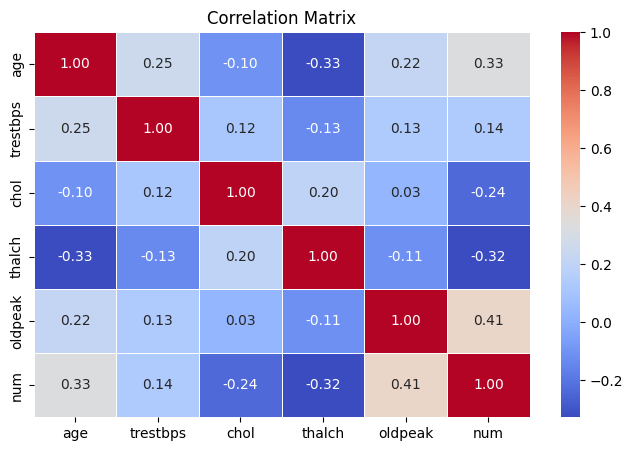

In [152]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 3. Feature Engineering

In [153]:
data = df.copy()

In [154]:
# Convert boolean column 'fbs' to numeric
data[['fbs','exang']] = data[['fbs', 'exang']].astype(int)

# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [155]:
# Scaling numerical features which have outliers
numerical_columns = ['trestbps', 'chol','oldpeak']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the processed data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,0.725,0.386401,1,0,150,0,0.556818,0,0,0
1,41,1,1,0.675,0.336650,0,1,132,0,0.295455,1,0,0
2,57,1,0,0.700,0.318408,0,1,148,0,0.340909,1,0,0
3,52,1,3,0.590,0.308458,0,0,190,0,0.295455,1,0,0
4,57,1,0,0.550,0.333333,0,1,126,1,0.465909,1,0,0


In [156]:
# Split the dataset into features (X) and target (y)
X = data.drop('num', axis=1)
y = data['num']

In [157]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [158]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

# summarize scores
scores = fit.scores_
features = fit.transform(X)

In [159]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,640.575035,thalch
2,159.163879,cp
0,157.032644,age
8,101.904963,exang
5,23.248068,fbs
1,18.235553,sex
10,11.222118,slope
11,7.544713,thal
4,7.349466,chol
9,5.832413,oldpeak


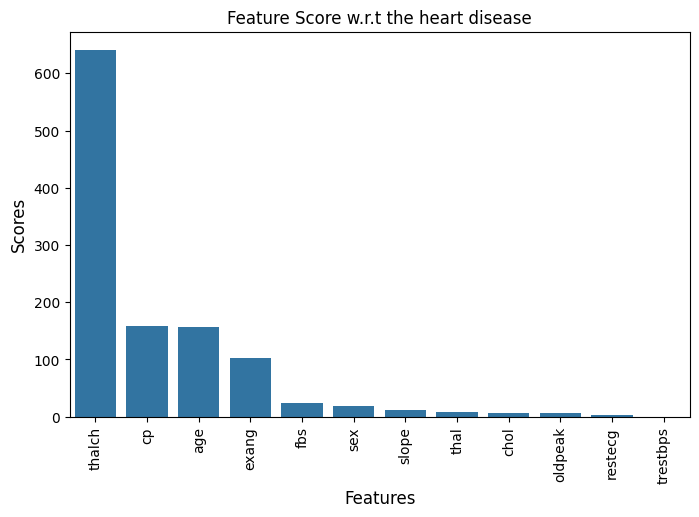

In [160]:
plt.figure(figsize=(8,5))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.Feature)
# set labels
plt.xlabel("Features", size=12)
plt.ylabel("Scores", size=12)
plt.yticks(rotation = 0, fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.title("Feature Score w.r.t the heart disease", size=12)
plt.show()

### Decision Tree Classification

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [162]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 12), (182, 12), (726,), (182,))

In [163]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Model Evaluation**

In [164]:
# Predictions
y_pred = dt_classifier.predict(X_test)

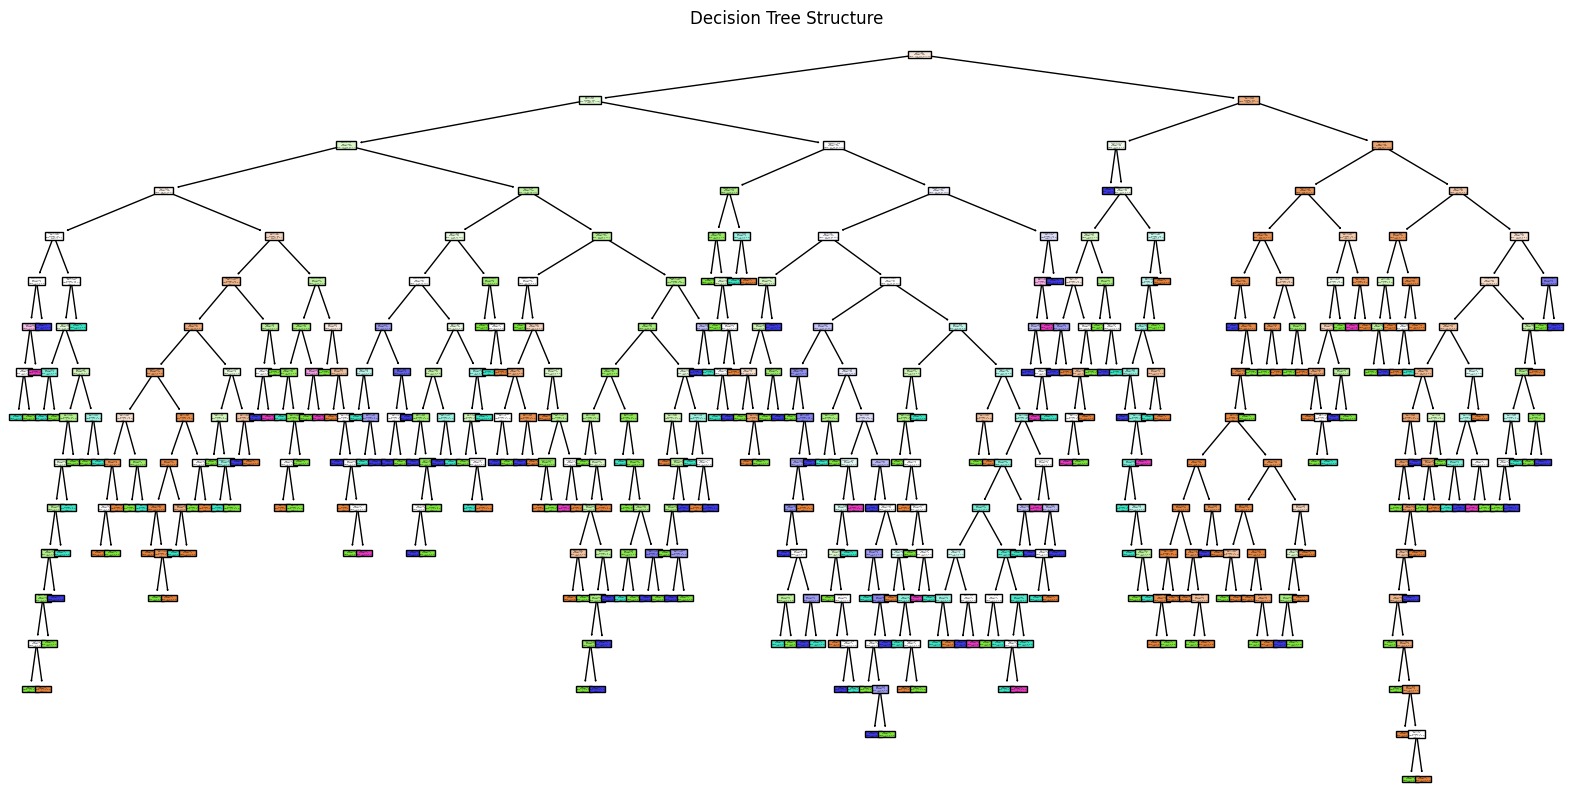

In [165]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        89
           1       0.35      0.38      0.36        48
           2       0.41      0.41      0.41        22
           3       0.18      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.34      0.34      0.34       182
weighted avg       0.52      0.52      0.52       182



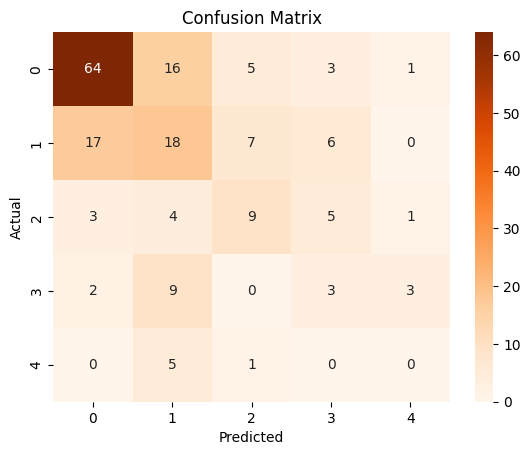

In [166]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix (optional)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 5. Hyperparameter Tuning

In [167]:
# Define the grid of parameters to search
param_grid = {
    'max_depth': [None, 2, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [168]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [169]:
# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'random'}
Best Score: 0.55


In [170]:
# Use the best estimator from grid search
best_dt = grid_search.best_estimator_

Tuned Model Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.69      0.83      0.76        89
           1       0.36      0.56      0.44        48
           2       0.00      0.00      0.00        22
           3       1.00      0.06      0.11        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.41      0.29      0.26       182
weighted avg       0.53      0.56      0.50       182



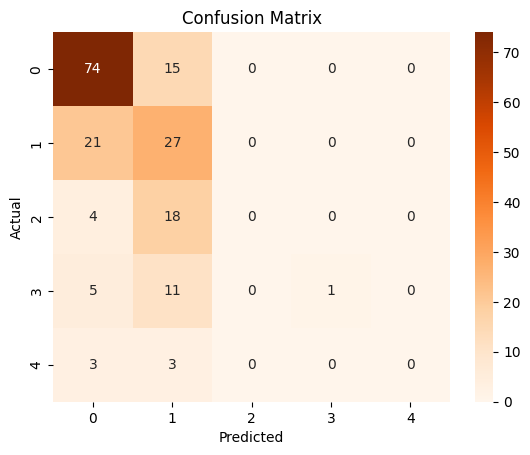

In [171]:
# Evaluate the tuned model
y_pred_tuned = best_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned:.2f}')

# Classification report
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix (optional)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned),annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 6. Model Evaluation and Analysis

### 1. Before Hyperparameter Tuning:

**Accuracy**: 0.52

**Macro Average**: Precision = 0.34, Recall = 0.34, F1-Score = 0.34

**Weighted Average**: Precision = 0.52, Recall = 0.52, F1-Score = 0.52

**Insights**:
- The model has an accuracy of 52%, indicating that it is slightly better than random guessing.
- Precision, recall, and F1-scores are quite low for classes 1, 2, 3, and 4, especially class 4 where the model fails to predict any instances correctly.
- Class 0 has the highest performance metrics, indicating that the model is biased towards predicting this class correctly.

### 2. After Hyperparameter Tuning:

**Best Parameters**: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'random'}

**Tuned Model Accuracy**: 0.56

**Macro Average**: Precision = 0.41, Recall = 0.29, F1-Score = 0.26

**Weighted Average**: Precision = 0.53, Recall = 0.56, F1-Score = 0.50

**Insights**:
- The accuracy improved slightly to 56% after hyperparameter tuning.
- Class 0 still has the highest metrics, but the recall improved significantly.
- Class 1 also shows improved recall, indicating the model is better at identifying instances of class 1.
- Classes 2, 3, and 4 still have poor performance, with class 3 having high precision but very low recall, meaning it rarely predicts this class, but when it does, it is mostly correct.
- Overall, the model performance is still biased towards certain classes, and more improvement is needed.

### Feature Importance(From Feature Engineering):
**Select KBest Scores**:
- **thalch**: 640.58
- **cp**: 159.16
- **age**: 157.03
- **exang**: 101.90
- **fbs**: 23.25
- **sex**: 18.24
- **slope**: 11.22
- **thal**: 7.54
- **chol**: 7.35
- **oldpeak**: 5.83
- **restecg**: 3.71
- **trestbps**: 0.27

**Insights**:
- **thalch** (maximum heart rate achieved) is the most important feature by a significant margin, followed by **cp** (chest pain type) and **age**.
- Features like **fbs** (fasting blood sugar) and **sex** are also relatively important.
- **trestbps** (resting blood pressure) has the lowest importance score.


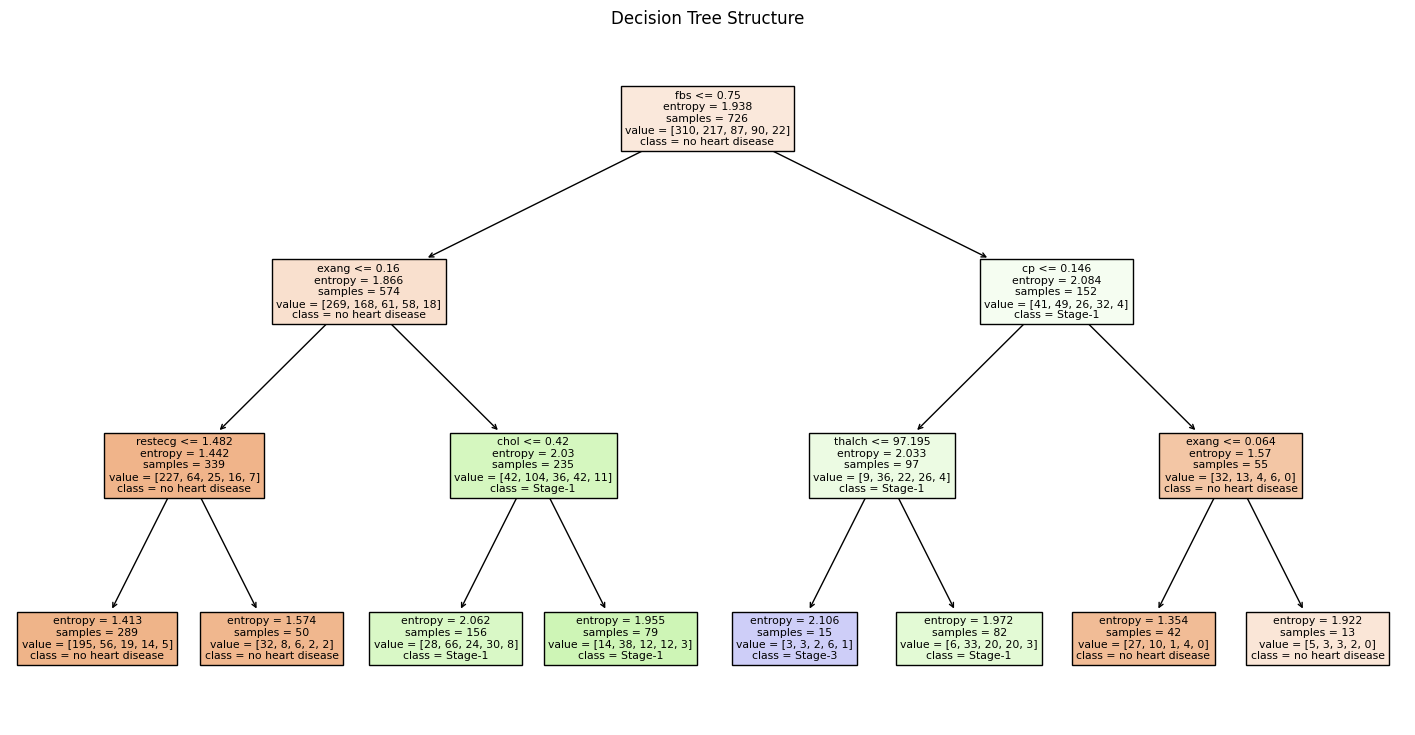

In [172]:
# Plot of tree for best model
plt.figure(figsize=(18, 9))
plot_tree(best_dt, feature_names=X.columns, class_names=['no heart disease', 'Stage-1', 'Stage-2', 'Stage-3', 'Stage-4'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

**Insights of Decision Tree Structure:**

*   The decision tree splits the data based on fbs (fasting blood sugar) first, indicating its importance in the model.
*   The next important splits involve exang (exercise-induced angina) and restecg (resting electrocardiographic results).
*   thalch (maximum heart rate achieved) appears in deeper splits, showing its importance for certain branches.
*   The tree shows that class 0 (no heart disease) is frequently predicted, explaining its high metrics.

**Feature Importance:** The decision tree primarily relies on fbs, exang, restecg, chol, cp, and thalch to classify the instances. These features are critical for determining the presence and type of heart disease.<br>

**Classification Patterns:**<br>


*   Low fbs combined with low exang and restecg values primarily classify instances as class 0 (no heart disease).
*   High fbs values with specific thresholds of cp and thalch can lead to classifications of class 3 or class 1.
*   The model uses chol values to differentiate between instances when fbs is low and exang is high, classifying them as class 1.


**Model Bias:** The decision tree structure shows a bias towards classifying instances as class 0, which aligns with the initial observations of higher performance metrics for this class.

Overall, the decision tree model has identified several key features and rules for classifying heart disease instances, providing insights into the importance of specific medical indicators in the dataset.

### Conclusion:
- The Decision Tree model shows improvement after hyperparameter tuning, with a slight increase in accuracy and better recall for certain classes.
- Important features identified (from SelectKBest) include **thalch**, **cp**, and **age**, which align with medical knowledge about heart disease.
- The model is still biased towards predicting class 0, and further techniques such as ensemble methods or more complex models could be explored to improve performance.
- Visualizing the decision tree helps in understanding the rules learned by the model and identifying areas for further feature engineering or data preprocessing.


### 1. Common Hyperparameters of Decision Tree Models and Their Effects

- **max_depth**: Limits the depth of the tree. Reducing depth prevents overfitting but may cause underfitting.
- **min_samples_split**: Minimum number of samples required to split a node. Higher values prevent overfitting by requiring more data to create a split.
- **min_samples_leaf**: Minimum number of samples required at a leaf node. Ensures leaves have enough data, reducing overfitting.
- **criterion**: Function to measure the quality of a split (e.g., "gini" or "entropy"). Affects how the tree splits data at each node.
- **max_features**: Number of features to consider when looking for the best split. Reducing features can reduce overfitting and improve computational efficiency.

### 2. Difference Between Label Encoding and One-hot Encoding

- **Label Encoding**: Converts categorical variables into numerical values (e.g., "Red" = 0, "Green" = 1, "Blue" = 2). Suitable for ordinal data but may introduce unintended ordinal relationships in nominal data.
- **One-hot Encoding**: Converts categorical variables into a binary matrix (e.g., "Red" = [1, 0, 0], "Green" = [0, 1, 0], "Blue" = [0, 0, 1]). Suitable for nominal data, preventing ordinal relationships but increasing dimensionality.
